In [8]:
import pandas as pd
import seaborn as sns

In [4]:
	df = pd.read_csv("data/Lijn 1 laaste 12 maanden.csv")
	df.head()

,DateTime,EL04_Process_Recipe_Working.MESQuality.Density_Max,EL04_Process_Recipe_Working.MESQuality.Density_Min,EL04_Process_Recipe_Working.MESQuality.Density_Target,EL04_Dry_Feed_Rate_PID.OUT,EL04_Dry_Feed_Rate_PID.PV,EL04_Dry_Feed_Rate_PID.SP
0,11/1/2022 3:38:15 PM,472,408,440,40.103806,6995.532227,7000
1,11/1/2022 3:53:15 PM,488,424,456,40.182373,7022.826660,7000
2,11/1/2022 4:08:15 PM,488,424,456,39.949310,7024.142090,7000
3,11/1/2022 4:23:15 PM,488,424,456,40.241974,6956.403320,7000
4,11/1/2022 4:38:15 PM,488,424,456,40.274620,7009.181641,7000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DateTime                                               13714 non-null  object 
 1   EL04_Process_Recipe_Working.MESQuality.Density_Max     13714 non-null  int64  
 2   EL04_Process_Recipe_Working.MESQuality.Density_Min     13714 non-null  int64  
 3   EL04_Process_Recipe_Working.MESQuality.Density_Target  13714 non-null  int64  
 4   EL04_Dry_Feed_Rate_PID.OUT                             13714 non-null  float64
 5   EL04_Dry_Feed_Rate_PID.PV                              13714 non-null  float64
 6   EL04_Dry_Feed_Rate_PID.SP                              13714 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 750.1+ KB


In [6]:
df.describe()

,EL04_Process_Recipe_Working.MESQuality.Density_Max,EL04_Process_Recipe_Working.MESQuality.Density_Min,EL04_Process_Recipe_Working.MESQuality.Density_Target,EL04_Dry_Feed_Rate_PID.OUT,EL04_Dry_Feed_Rate_PID.PV,EL04_Dry_Feed_Rate_PID.SP
count,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000,13714.000000
mean,470.319382,406.319382,438.319382,49.692405,8104.728011,8103.718827
std,41.310679,41.310679,41.310679,9.541629,1363.699860,1362.978975
min,376.000000,312.000000,344.000000,27.269726,5005.729492,5000.000000
25%,448.000000,384.000000,416.000000,40.355180,6996.315430,7000.000000
50%,464.000000,400.000000,432.000000,50.633371,8002.236572,8000.000000
75%,488.000000,424.000000,456.000000,57.003915,8986.890625,9000.000000
max,560.000000,496.000000,528.000000,72.572685,11126.326172,11000.000000


<Axes: xlabel='EL04_Dry_Feed_Rate_PID.PV', ylabel='Count'>

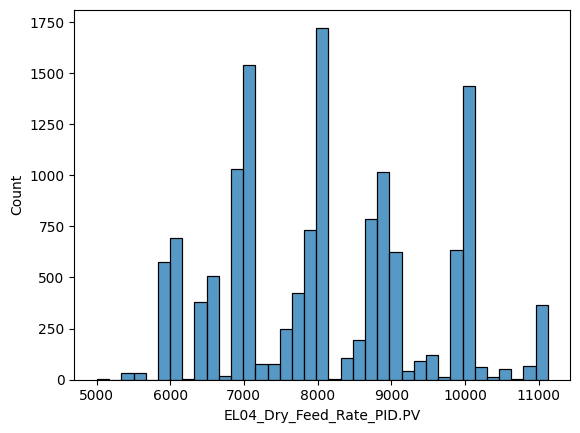

In [9]:
sns.histplot(df["EL04_Dry_Feed_Rate_PID.PV"])

<Axes: xlabel='EL04_Dry_Feed_Rate_PID.OUT'>

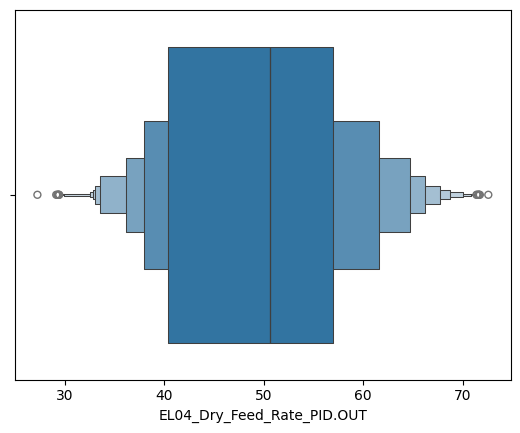

In [12]:
sns.boxenplot(x=df["EL04_Dry_Feed_Rate_PID.OUT"])

<Axes: xlabel='EL04_Dry_Feed_Rate_PID.PV', ylabel='EL04_Dry_Feed_Rate_PID.SP'>

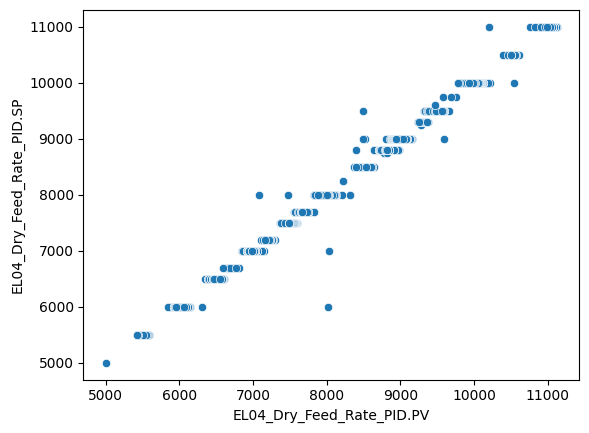

In [13]:
sns.scatterplot(data=df, x="EL04_Dry_Feed_Rate_PID.PV",y="EL04_Dry_Feed_Rate_PID.SP" )